# Building a News Question Answering System

A Question and Answer (QnA) is one of the popular applications of Machine Reading Comprehension (MRC).

The Machine Reading Comprehension system aims to process sequential data such as texts to `answer` (A) given a `context data` (P) and a `question` (Q).



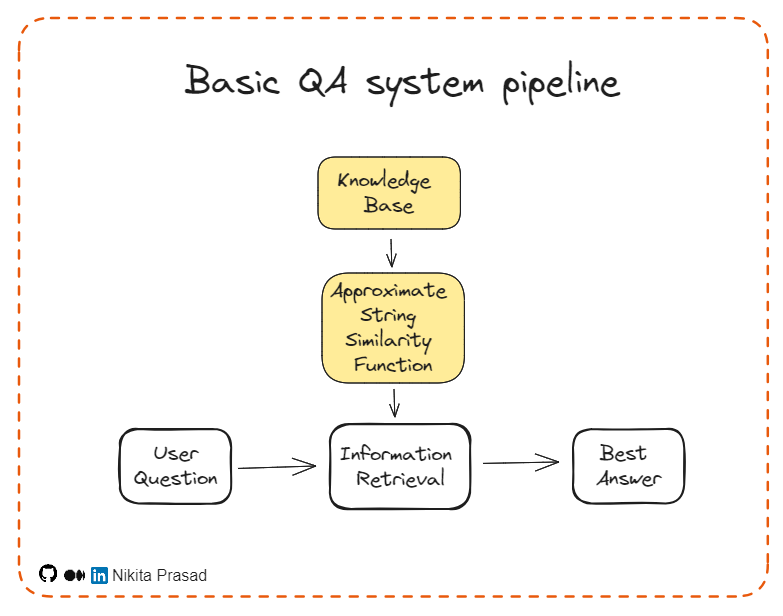



The information-retrieval process in QA systems is divided into three stages: question processing, ranking, and answer extraction. Question processing and ranking can be performed using algorithmic functions or transformer model, here used both






**Data:**

Working wth JSON file consisting of 37000+ news articles scraped from different sources majorly about Israel Hamas War and other topics.

**Articles Format Snippet**

      {
        "articleBody": "Sanjay Raut, ---- practices.",
        "dateModified": {
          "$date": "2023-10-25T06:35:50.000Z"
        },
        "scrapedDate": {
          "$date": "2023-10-27T13:12:18.339Z"
        },
        "source": "https://www.thehansindia.com/",
        "title": "Shiv Sena MP Sanjay Raut Responds To 'Hamas' Remark In Fiery Exchange"
      }

In [ ]:
# Importing Libraries for Data Laoding
import pandas as pd
import numpy as np
import re
import json

In [ ]:
with open('/content/news.article.json') as f:
    json_data = json.load(f)

# Normalize the JSON data to a DataFrame
df = pd.json_normalize(json_data)

In [ ]:
# Display the DataFrame
df

,articleBody,source,title,dateModified.$date,scrapedDate.$date
0,"Sanjay Raut, a member of the Shiv Sena (UBT) p...",https://www.thehansindia.com/,Shiv Sena MP Sanjay Raut Responds To 'Hamas' R...,2023-10-25T06:35:50.000Z,2023-10-27T13:12:18.339Z
1,"Kozhikode (Kerala) [India], October 27 (ANI): ...",https://www.aninews.in/,At IUML's pro-Palestine rally in Kerala Tharoo...,NaN,2023-10-27T13:12:45.595Z
2,"Mumbai, Oct 24 (PTI) Maharashtra Chief Ministe...",https://thefederal.com/,Uddhav buried Bal Thackeray's 'Hindutva' for p...,2023-10-25T02:14:27.000Z,2023-10-27T13:12:18.339Z
3,"Sensex, Nifty rebound over 1 pc after six sess...",https://english.varthabharati.in/,"New Bills replacing IPC, CrPC, Evidence Act wi...",NaN,2023-10-27T13:12:41.618Z
4,"October 26, 2023 08:15 pm | Updated 08:38 pm I...",https://www.thehindu.com/,"Israel biggest terrorist nation in the world, ...",2023-10-26T14:45:24.000Z,2023-10-27T13:12:45.595Z
...,...,...,...,...,...
37415,Lebanese media are reporting renewed IDF strik...,https://www.timesofisrael.com/,Lebanese media reports renewed IDF strikes in ...,NaN,2024-03-31T03:10:17.646Z
37416,Amid escalating tensions and concerns over pot...,https://www.deccanchronicle.com/,"US approves additional bombs, warplanes sales ...",2024-03-31T03:03:52.000Z,2024-03-31T03:09:38.331Z
37417,"Haaretz.com, the online English edition of Haa...",https://www.haaretz.com/,Israel Publishes Video of Islamic Jihad Terror...,2024-03-28T00:00:00.000Z,2024-03-31T03:09:46.683Z
37418,"The UN secretary general, António Guterres, ha...",https://www.theguardian.com/,United Nations secretary general condemns expl...,2024-03-31T00:00:00.000Z,2024-03-31T03:09:50.586Z


In [ ]:
# Display the first row of "articleBody" column
df["articleBody"][0]

'Sanjay Raut, a member of the Shiv Sena (UBT) party, responded to the Maharashtra chief minister\'s statement that Eknath Shinde "himself is Hamas" and that the Shiv Sena group led by Uddhav Thackeray is capable of collaborating with "Hamas and Lashkar-e-Taiba for their own selfishness" on Wednesday by claiming that Eknath Shinde is Hamas.\n\n\n\nRaut made fun of Shinde by claiming, "He himself is Hamas. Hamas and Lashkar-e-Taiba, two terrorist groups, are completely irrelevant in Maharashtra. But the BJP is to blame for sowing the worms in their (the Shinde faction\'s) thoughts, said Raut.\n\nWhen Shinde made a statement at the Tuesday Dussehra rally in Mumbai\'s Azad Maidan, Raut reacted to it. As part of the opposition alliance INDIA, Uddhav Thackeray\'s Shiv Sena (UBT) has formed an alliance with Congress and the Samajwadi Party. Shinde remarked of this alliance: "For their own selfishness, they will tie the knot with Hamas and Lashkar-e-Taiba."\n\nRaut highlighted that Shinde\'s a

In [ ]:
# Display the first row of "title" column
df["title"][0]

"Shiv Sena MP Sanjay Raut Responds To 'Hamas' Remark In Fiery Exchange"

In [ ]:
# Combine headline and description for context
df['context'] = df['title'] + '. ' + df['articleBody']

In [ ]:
# Display the first row of "context" column
df['context'][0]

'Shiv Sena MP Sanjay Raut Responds To \'Hamas\' Remark In Fiery Exchange. Sanjay Raut, a member of the Shiv Sena (UBT) party, responded to the Maharashtra chief minister\'s statement that Eknath Shinde "himself is Hamas" and that the Shiv Sena group led by Uddhav Thackeray is capable of collaborating with "Hamas and Lashkar-e-Taiba for their own selfishness" on Wednesday by claiming that Eknath Shinde is Hamas.\n\n\n\nRaut made fun of Shinde by claiming, "He himself is Hamas. Hamas and Lashkar-e-Taiba, two terrorist groups, are completely irrelevant in Maharashtra. But the BJP is to blame for sowing the worms in their (the Shinde faction\'s) thoughts, said Raut.\n\nWhen Shinde made a statement at the Tuesday Dussehra rally in Mumbai\'s Azad Maidan, Raut reacted to it. As part of the opposition alliance INDIA, Uddhav Thackeray\'s Shiv Sena (UBT) has formed an alliance with Congress and the Samajwadi Party. Shinde remarked of this alliance: "For their own selfishness, they will tie the k

In [ ]:
df

,articleBody,source,title,dateModified.$date,scrapedDate.$date,context
0,"Sanjay Raut, a member of the Shiv Sena (UBT) p...",https://www.thehansindia.com/,Shiv Sena MP Sanjay Raut Responds To 'Hamas' R...,2023-10-25T06:35:50.000Z,2023-10-27T13:12:18.339Z,Shiv Sena MP Sanjay Raut Responds To 'Hamas' R...
1,"Kozhikode (Kerala) [India], October 27 (ANI): ...",https://www.aninews.in/,At IUML's pro-Palestine rally in Kerala Tharoo...,NaN,2023-10-27T13:12:45.595Z,At IUML's pro-Palestine rally in Kerala Tharoo...
2,"Mumbai, Oct 24 (PTI) Maharashtra Chief Ministe...",https://thefederal.com/,Uddhav buried Bal Thackeray's 'Hindutva' for p...,2023-10-25T02:14:27.000Z,2023-10-27T13:12:18.339Z,Uddhav buried Bal Thackeray's 'Hindutva' for p...
3,"Sensex, Nifty rebound over 1 pc after six sess...",https://english.varthabharati.in/,"New Bills replacing IPC, CrPC, Evidence Act wi...",NaN,2023-10-27T13:12:41.618Z,"New Bills replacing IPC, CrPC, Evidence Act wi..."
4,"October 26, 2023 08:15 pm | Updated 08:38 pm I...",https://www.thehindu.com/,"Israel biggest terrorist nation in the world, ...",2023-10-26T14:45:24.000Z,2023-10-27T13:12:45.595Z,"Israel biggest terrorist nation in the world, ..."
...,...,...,...,...,...,...
37415,Lebanese media are reporting renewed IDF strik...,https://www.timesofisrael.com/,Lebanese media reports renewed IDF strikes in ...,NaN,2024-03-31T03:10:17.646Z,Lebanese media reports renewed IDF strikes in ...
37416,Amid escalating tensions and concerns over pot...,https://www.deccanchronicle.com/,"US approves additional bombs, warplanes sales ...",2024-03-31T03:03:52.000Z,2024-03-31T03:09:38.331Z,"US approves additional bombs, warplanes sales ..."
37417,"Haaretz.com, the online English edition of Haa...",https://www.haaretz.com/,Israel Publishes Video of Islamic Jihad Terror...,2024-03-28T00:00:00.000Z,2024-03-31T03:09:46.683Z,Israel Publishes Video of Islamic Jihad Terror...
37418,"The UN secretary general, António Guterres, ha...",https://www.theguardian.com/,United Nations secretary general condemns expl...,2024-03-31T00:00:00.000Z,2024-03-31T03:09:50.586Z,United Nations secretary general condemns expl...


Filtering the Data to reduce computation.

In [ ]:
# Keywords to filter the rows
keywords = ["Hamas", "Gaza", "Al Shifa Hospital", "hospital", "Israel"]

# Filter the DataFrame to include only rows where the context column contains any of the keywords
filtered_df = df[df['context'].str.contains('|'.join(keywords), case=False, na=False)]

filtered_df

,articleBody,source,title,dateModified.$date,scrapedDate.$date,context
0,"Sanjay Raut, a member of the Shiv Sena (UBT) p...",https://www.thehansindia.com/,Shiv Sena MP Sanjay Raut Responds To 'Hamas' R...,2023-10-25T06:35:50.000Z,2023-10-27T13:12:18.339Z,Shiv Sena MP Sanjay Raut Responds To 'Hamas' R...
1,"Kozhikode (Kerala) [India], October 27 (ANI): ...",https://www.aninews.in/,At IUML's pro-Palestine rally in Kerala Tharoo...,NaN,2023-10-27T13:12:45.595Z,At IUML's pro-Palestine rally in Kerala Tharoo...
2,"Mumbai, Oct 24 (PTI) Maharashtra Chief Ministe...",https://thefederal.com/,Uddhav buried Bal Thackeray's 'Hindutva' for p...,2023-10-25T02:14:27.000Z,2023-10-27T13:12:18.339Z,Uddhav buried Bal Thackeray's 'Hindutva' for p...
3,"Sensex, Nifty rebound over 1 pc after six sess...",https://english.varthabharati.in/,"New Bills replacing IPC, CrPC, Evidence Act wi...",NaN,2023-10-27T13:12:41.618Z,"New Bills replacing IPC, CrPC, Evidence Act wi..."
4,"October 26, 2023 08:15 pm | Updated 08:38 pm I...",https://www.thehindu.com/,"Israel biggest terrorist nation in the world, ...",2023-10-26T14:45:24.000Z,2023-10-27T13:12:45.595Z,"Israel biggest terrorist nation in the world, ..."
...,...,...,...,...,...,...
37415,Lebanese media are reporting renewed IDF strik...,https://www.timesofisrael.com/,Lebanese media reports renewed IDF strikes in ...,NaN,2024-03-31T03:10:17.646Z,Lebanese media reports renewed IDF strikes in ...
37416,Amid escalating tensions and concerns over pot...,https://www.deccanchronicle.com/,"US approves additional bombs, warplanes sales ...",2024-03-31T03:03:52.000Z,2024-03-31T03:09:38.331Z,"US approves additional bombs, warplanes sales ..."
37417,"Haaretz.com, the online English edition of Haa...",https://www.haaretz.com/,Israel Publishes Video of Islamic Jihad Terror...,2024-03-28T00:00:00.000Z,2024-03-31T03:09:46.683Z,Israel Publishes Video of Islamic Jihad Terror...
37418,"The UN secretary general, António Guterres, ha...",https://www.theguardian.com/,United Nations secretary general condemns expl...,2024-03-31T00:00:00.000Z,2024-03-31T03:09:50.586Z,United Nations secretary general condemns expl...


Not much advantage of filtering data.

### Data Cleaning

Since the data is uses in Question-Answering system, only Special Characters and Extra Whitespaces were cleaned.

In [ ]:
# Data Cleaning Code
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s,.]', '', text)  # Remove special characters
    return text.strip()

In [ ]:
# Applying function
filtered_df['context'] = filtered_df['context'].apply(clean_text)

# Display cleaned data
filtered_df.head()

<ipython-input-35-4b2876f06070>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['context'] = filtered_df['context'].apply(clean_text)


,articleBody,source,title,dateModified.$date,scrapedDate.$date,context
0,"Sanjay Raut, a member of the Shiv Sena (UBT) p...",https://www.thehansindia.com/,Shiv Sena MP Sanjay Raut Responds To 'Hamas' R...,2023-10-25T06:35:50.000Z,2023-10-27T13:12:18.339Z,Shiv Sena MP Sanjay Raut Responds To Hamas Rem...
1,"Kozhikode (Kerala) [India], October 27 (ANI): ...",https://www.aninews.in/,At IUML's pro-Palestine rally in Kerala Tharoo...,NaN,2023-10-27T13:12:45.595Z,At IUMLs proPalestine rally in Kerala Tharoor ...
2,"Mumbai, Oct 24 (PTI) Maharashtra Chief Ministe...",https://thefederal.com/,Uddhav buried Bal Thackeray's 'Hindutva' for p...,2023-10-25T02:14:27.000Z,2023-10-27T13:12:18.339Z,Uddhav buried Bal Thackerays Hindutva for powe...
3,"Sensex, Nifty rebound over 1 pc after six sess...",https://english.varthabharati.in/,"New Bills replacing IPC, CrPC, Evidence Act wi...",NaN,2023-10-27T13:12:41.618Z,"New Bills replacing IPC, CrPC, Evidence Act wi..."
4,"October 26, 2023 08:15 pm | Updated 08:38 pm I...",https://www.thehindu.com/,"Israel biggest terrorist nation in the world, ...",2023-10-26T14:45:24.000Z,2023-10-27T13:12:45.595Z,"Israel biggest terrorist nation in the world, ..."


In [ ]:
# Display the first row of cleaned "context" column
filtered_df['context'][0]

'Shiv Sena MP Sanjay Raut Responds To Hamas Remark In Fiery Exchange. Sanjay Raut, a member of the Shiv Sena UBT party, responded to the Maharashtra chief ministers statement that Eknath Shinde himself is Hamas and that the Shiv Sena group led by Uddhav Thackeray is capable of collaborating with Hamas and LashkareTaiba for their own selfishness on Wednesday by claiming that Eknath Shinde is Hamas. Raut made fun of Shinde by claiming, He himself is Hamas. Hamas and LashkareTaiba, two terrorist groups, are completely irrelevant in Maharashtra. But the BJP is to blame for sowing the worms in their the Shinde factions thoughts, said Raut. When Shinde made a statement at the Tuesday Dussehra rally in Mumbais Azad Maidan, Raut reacted to it. As part of the opposition alliance INDIA, Uddhav Thackerays Shiv Sena UBT has formed an alliance with Congress and the Samajwadi Party. Shinde remarked of this alliance For their own selfishness, they will tie the knot with Hamas and LashkareTaiba. Raut 

### Document Corpus

Collection of all the rows of "Context" column only, because only that is our target column.


In [ ]:
docs = filtered_df['context']

In [ ]:
for doc in docs[:3]:
  print (doc)

Shiv Sena MP Sanjay Raut Responds To Hamas Remark In Fiery Exchange. Sanjay Raut, a member of the Shiv Sena UBT party, responded to the Maharashtra chief ministers statement that Eknath Shinde himself is Hamas and that the Shiv Sena group led by Uddhav Thackeray is capable of collaborating with Hamas and LashkareTaiba for their own selfishness on Wednesday by claiming that Eknath Shinde is Hamas. Raut made fun of Shinde by claiming, He himself is Hamas. Hamas and LashkareTaiba, two terrorist groups, are completely irrelevant in Maharashtra. But the BJP is to blame for sowing the worms in their the Shinde factions thoughts, said Raut. When Shinde made a statement at the Tuesday Dussehra rally in Mumbais Azad Maidan, Raut reacted to it. As part of the opposition alliance INDIA, Uddhav Thackerays Shiv Sena UBT has formed an alliance with Congress and the Samajwadi Party. Shinde remarked of this alliance For their own selfishness, they will tie the knot with Hamas and LashkareTaiba. Raut h

### TF-IDF Retriever

Document Segmenting: To make sure that each document is short enough to fit into the 512 token limit of BERT. If a document is longer than 512 tokens, this code will simply segment it into multiple smaller chunks and add them to the final corpus.

In [ ]:
def segment_documents(docs, max_doc_length=512):
  # List containing full and segmented docs
  segmented_docs = []

  for doc in docs:
    # Split document by spaces to obtain a word count that roughly approximates the token count
    split_to_words = doc.split(" ")

    # If the document is longer than our maximum length, split it up into smaller segments and add them to the list
    if len(split_to_words) > max_doc_length:
      for doc_segment in range(0, len(split_to_words), max_doc_length):
        segmented_docs.append( " ".join(split_to_words[doc_segment:doc_segment + max_doc_length]))

    # If the document is shorter than our maximum length, add it to the list
    else:
      segmented_docs.append(doc)

  return segmented_docs

### Finding Relevant Documents

To find the subset of documents that are most likely to contain answer within this corpus, because running every single document through BERT model is compuationally expensive and may not be efficient to narrow down a good answer.

**Work Flow:**

1. Using scikit-learn `TF-IDF vectorizer` to convert documents and input question into vectors.

2. The document vectors with the highest cosine similarity to the user question vector will be the best candidates to search for the answer.

3. Then, these top candidate documents will be feed into the SQUAD model to get the best predicted answers.

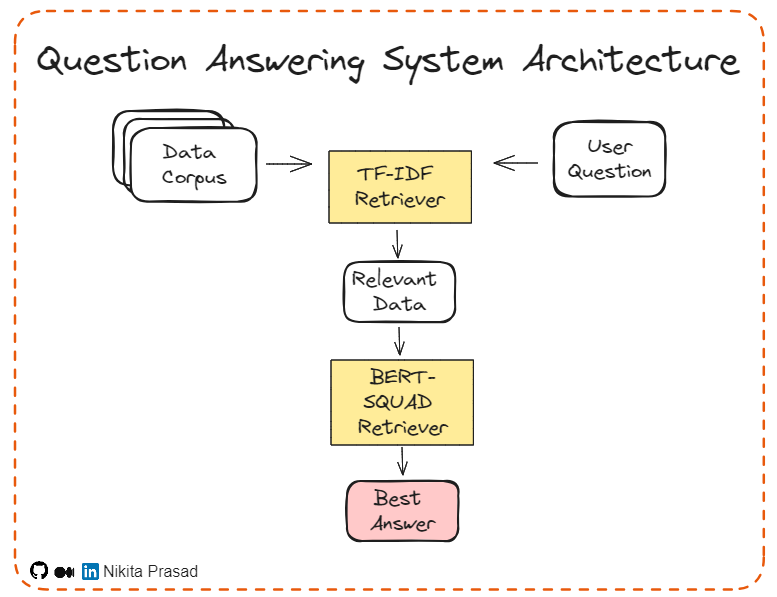

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def get_top_k_articles(query, docs, k=2):

  # Initialize a vectorizer that removes English stop words
  vectorizer = TfidfVectorizer(analyzer="word", stop_words='english')

  # Create a corpus of query and documents and convert to TFIDF vectors
  query_and_docs = [query] + docs
  matrix = vectorizer.fit_transform(query_and_docs)

  # Holds our cosine similarity scores
  scores = []

  # The first vector is our query text, so compute the similarity of our query against all document vectors
  for i in range(1, len(query_and_docs)):
    scores.append(cosine_similarity(matrix[0], matrix[i])[0][0])

  # Sort list of scores and return the top k highest scoring documents
  sorted_list = sorted(enumerate(scores), key=lambda x: x[1], reverse=True)
  top_doc_indices = [x[0] for x in sorted_list[:k]]
  top_docs = [docs[x] for x in top_doc_indices]

  return top_docs

### Using BERT-SQuAD Retriever

Using `BERT` model that has been fine-tuned on Stanford Question Answering Dataset (SQuAD), designed for training and evaluating question answering systems.

In [ ]:
# Import the huggingface BERT library
from transformers import BertTokenizer, BertForQuestionAnswering
import torch

In [ ]:
# Load the BERT model and tokenizer
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

### Calling the Model


This function takes a question and a context (answer_text), tokenizes them, feeds them into a pre-trained BERT model, and identifies the span of text within the context that best answers the question.

In [ ]:
def answer_question(question, answer_text):

    input_ids = tokenizer.encode(question, answer_text, max_length=512)

    # ======== Set Segment IDs ========
    # Search the input_ids for the first instance of the `[SEP]` token.
    sep_index = input_ids.index(tokenizer.sep_token_id)

    # The number of segment A tokens includes the [SEP] token istelf.
    num_seg_a = sep_index + 1

    # The remainder are segment B.
    num_seg_b = len(input_ids) - num_seg_a

    # Construct the list of 0s and 1s.
    segment_ids = [0]*num_seg_a + [1]*num_seg_b

    # There should be a segment_id for every input token.
    assert len(segment_ids) == len(input_ids)

    outputs = model(torch.tensor([input_ids]), # The tokens representing our input text.
                    token_type_ids=torch.tensor([segment_ids]), # The segment IDs to differentiate question from answer_text
                    return_dict=True)

    start_scores = outputs.start_logits
    end_scores = outputs.end_logits

    # ======== Reconstruct Answer ========
    # Find the tokens with the highest `start` and `end` scores.
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)

    # Get the string versions of the input tokens.
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    # Start with the first token.
    answer = tokens[answer_start]

    # Select the remaining answer tokens and join them with whitespace.
    for i in range(answer_start + 1, answer_end + 1):

        # If it's a subword token, then recombine it with the previous token.
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]

        # Otherwise, add a space then the token.
        else:
            answer += ' ' + tokens[i]

    print('Answer: "' + answer + '"')

### Testing the Model

Let’s ask the question-answering system a question about 'Al-Shifa Hospital'.

Returning `Top-3' answers and then choosing the best answer from that.

In [ ]:
# Enter question here
query = "What happened at Al-Shifa Hospital?"

# Segment our documents
segmented_docs = segment_documents(docs, 512)

# Retrieve the top k most relevant documents to the query
candidate_docs = get_top_k_articles(query, segmented_docs, 3)

# Return the likeliest answers from each of our top k most relevant documents in descending order
for i in candidate_docs:
  answer_question(query, i)
  print ("Reference Document: ", i)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


Answer: "[CLS]"
Reference Document:  and rooms, but their use is unverifiable from these materials. While they could have been used for military purposes, they also could have been used for medical or humanitarian purposes. Current and former Israeli officials have acknowledged that when Israel expanded al Shifa Hospital decades ago, during its physical occupation of Gaza, they dug out basements or underground bunkers under certain buildings to expand its medical capacity. Israeli officials maintain that Hamas expanded the basements originally built by Israel, going deeper and connecting it to a network of tunnels. This history demonstrates that the mere existence of tunnels or bunkers under the hospital is not evidence of military activity. What is required is proof of military use of the tunnels or bunkersproof that has not yet been presented. The Israeli military also released two videos reportedly depicting two hostages inside al Shifa Hospital on the morning of Oct. 7, claiming th

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


Answer: "gazas largest medical centre , serving the medical needs of hundreds of thousands of palestinians"
Reference Document:  Gazas Shifa Hospital medical centre or Hamas headquarters. Browse  Home Featured Articles  Gazas Shifa Hospital medical centre or Hamas headquarters  JWire Gazas Shifa Hospital medical centre or Hamas headquarters Read on for article While the AlAhli Hospital in northern Gaza has been the epicentre of international attention, another hospital in the Strip will likely be in the headlines after a widelyexpected Israeli ground invasion begins. Shifa Hospital, located in the North Rimal neighbourhood and boasting 570 beds, is Gazas largest medical centre, serving the medical needs of hundreds of thousands of Palestinians. But as Gazans are already aware, Hamas makes extensive use of the hospital too. Knowing that Israel would not dare attack a hospital during a war, Hamas leaders hide there, launch rockets from its compound, hide hostages in the bowels of the bui

In [ ]:
# Printing the best answer for the question
answer = answer_question(query, candidate_docs[2])
if answer is not None:
    print("Answer:", answer)
print("Reference Document:", candidate_docs[2])


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


Answer: "israeli tanks hit several buildings at al shifa hospital and set fire to a surgery department"
Reference Document: Battles rage around Gazas Al Shifa hospital, Israel says 170 gunmen dead By Reuters. By Nidal alMughrabi and Bassam Masoud CAIROGAZA Reuters Fighting raged on Saturday around Gazas main hospital where Israel says it has so far killed more than 170 gunmen in an extensive raid, which the Palestinian Health Ministry says has also resulted in the deaths of five patients. The armed wing of Hamas and the Islamic Jihad said their fighters were engaged in battles with the Israeli forces outside and around the vicinity of Al Shifa hospital in Gaza City. Hamas denies any presence inside the facility. Israeli troops stormed Al Shifa in the early hours of Monday and have been combing through the sprawling complex, which the military says is connected to a tunnel network used as a base for Hamas and other Palestinian fighters. The Gaza health ministry said five wounded Palesti

This is the rudimentary Question-Answering System, that can answer for the Israel Hamas War related question.